In [ ]:
# Exploratory Data Analysis – Netflix Titles

In [ ]:
# Import Libraries & Load Dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

df = pd.read_csv("netflix_titles.csv")
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.shape
df.info()
df.describe(include="all")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s8807,Movie,Zubaan,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [ ]:
# Data Cleaning

In [12]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country            0
date_added        98
release_year       0
rating             0
duration           3
listed_in          0
description        0
year_added        98
dtype: int64

In [13]:
df["country"] = df["country"].fillna("Unknown")
df["rating"] = df["rating"].fillna("Not Rated")
df["date_added"] = pd.to_datetime(df["date_added"], errors="coerce")

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df["year_added"] = df["date_added"].dt.year

In [16]:
# Visualizations

In [17]:
# 1. Movies vs TV Shows

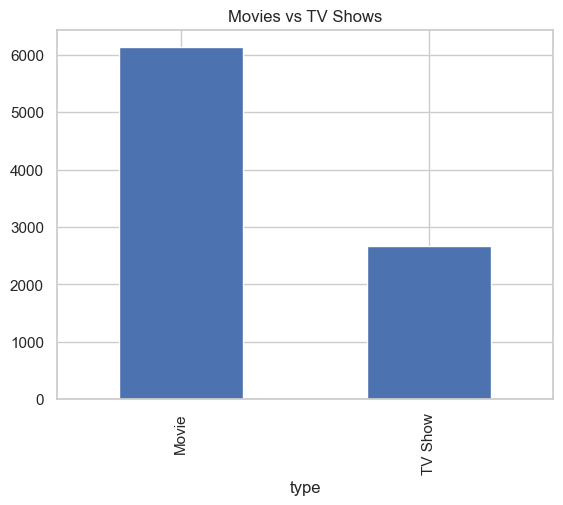

In [18]:
df["type"].value_counts().plot(kind="bar", title="Movies vs TV Shows")
plt.show()


In [ ]:
 # 2. Top 10 Genres

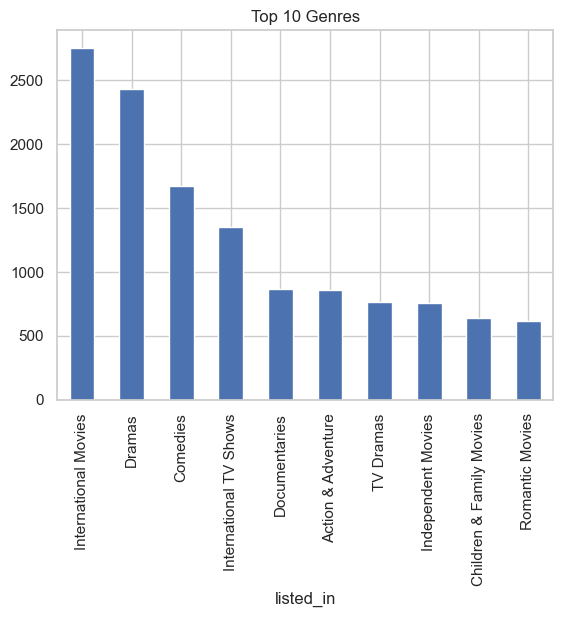

In [19]:
genres = df["listed_in"].str.split(", ").explode()
genres.value_counts().head(10).plot(kind="bar")
plt.title("Top 10 Genres")
plt.show()


In [ ]:
# 3. Content Added per Yea

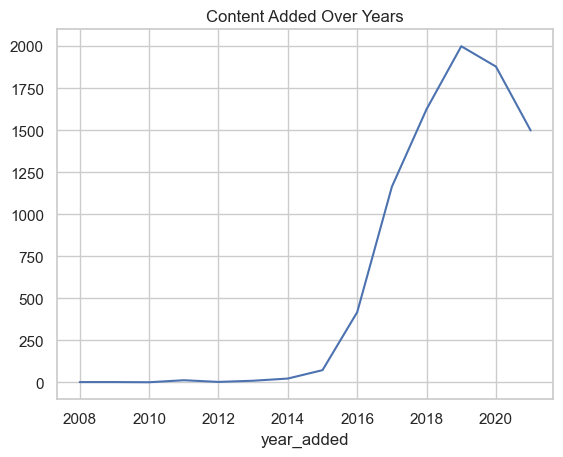

In [20]:
df["year_added"].value_counts().sort_index().plot(kind="line")
plt.title("Content Added Over Years")
plt.show()


In [ ]:
# 4. Top Producing Countries

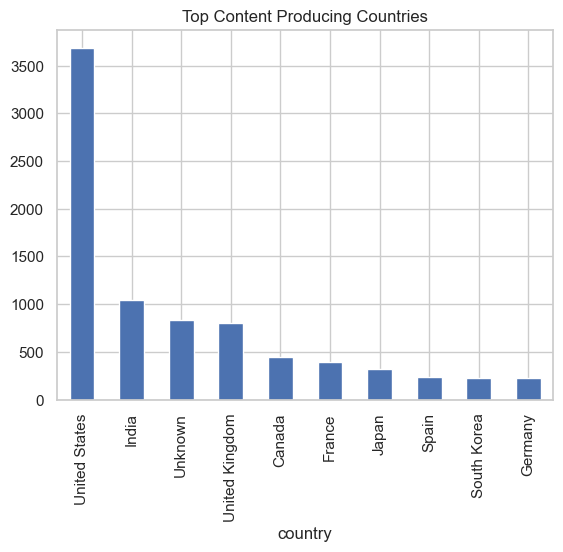

In [21]:
countries = df["country"].str.split(", ").explode()
countries.value_counts().head(10).plot(kind="bar")
plt.title("Top Content Producing Countries")
plt.show()


In [ ]:
# 5. Rating Distribution

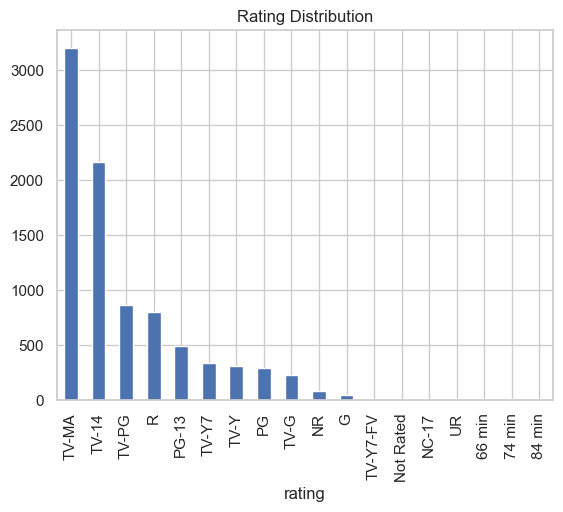

In [22]:
df["rating"].value_counts().plot(kind="bar")
plt.title("Rating Distribution")
plt.show()


In [ ]:
# 6. Duration Distribution (Movies)

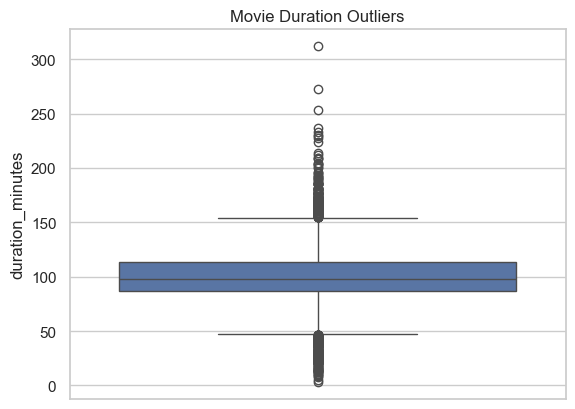

In [23]:
movies = df[df["type"] == "Movie"].copy()
movies["duration_minutes"] = movies["duration"].str.replace(" min", "").astype(float)

sns.boxplot(y=movies["duration_minutes"])
plt.title("Movie Duration Outliers")
plt.show()


In [27]:
### Write at least five insights 
# 1. Movies dominate Netflix content compared to TV Shows.

# 2. Drama and International Movies are the most frequent genres.

# 3. Netflix content additions peaked after 2016.

# 4. The United States produces the highest number of titles.

# 5. Most movies have a duration between 80–120 minutes.